# SVM Parameters – C and Gamma

## 1. Introduction

SVM performance depends heavily on two key parameters:
- **C**: Regularization parameter (trade-off between margin size and misclassification).
- **Gamma**: Defines how far the influence of a single point reaches in RBF kernel.

We'll explore how changing these affects the decision boundary.


## 2. Load and Prepare Data


In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 2]
y = y[y != 2]

# Scale and reduce to 2D
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


## 3. Visualize SVM with Different C and Gamma Values


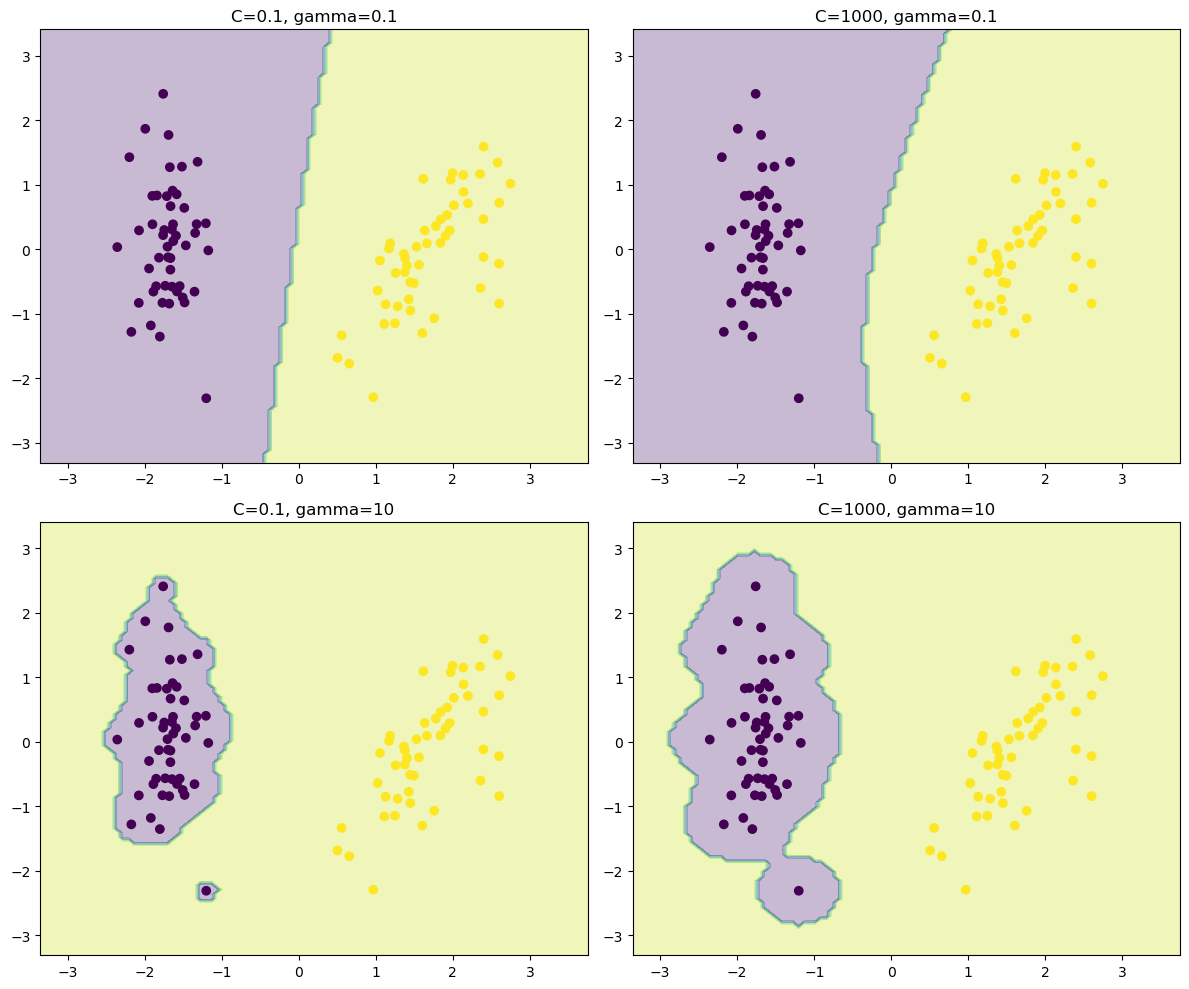

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Grid for plots
def plot_svm(C, gamma, subplot):
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(X_reduced, y)

    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(subplot)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
    plt.title(f"C={C}, gamma={gamma}")

# Plot 4 variations
plt.figure(figsize=(12, 10))
plot_svm(C=0.1, gamma=0.1, subplot=221)
plot_svm(C=1000, gamma=0.1, subplot=222)
plot_svm(C=0.1, gamma=10, subplot=223)
plot_svm(C=1000, gamma=10, subplot=224)
plt.tight_layout()
plt.show()


## 4. Summary

- **C low**: Wider margin, more tolerance for misclassification.
- **C high**: Less tolerance for error, more risk of overfitting.
- **Gamma low**: Points far apart affect each other.
- **Gamma high**: Decision boundary becomes very sensitive to nearby points.

Fine-tuning these is essential in practice!
